In [69]:
import pandas as pd
import numpy as np 
raw_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Final_project/data/output/분석결과/강병원_결과.csv',
                        encoding='utf-8')
display(raw_data)

,Unnamed: 0,결과,날짜
0,0,['1'],2019.09.13.
1,1,['1'],2019.09.20.
2,2,['1'],2019.09.20.
3,3,['1'],2019.10.01.
4,4,['1'],2019.10.21.
...,...,...,...
86,86,['1'],2020.02.27.
87,87,['1'],2020.02.27.
88,88,['1'],2020.02.27.
89,89,['1'],2020.02.27.


,결과,날짜
0,['1'],2019.09.13.
1,['1'],2019.09.20.
2,['1'],2019.09.20.
3,['1'],2019.10.01.
4,['1'],2019.10.21.
...,...,...
86,['1'],2020.02.27.
87,['1'],2020.02.27.
88,['1'],2020.02.27.
89,['1'],2020.02.27.


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_te

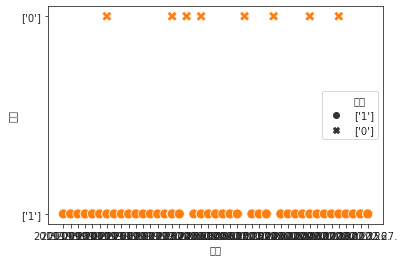

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

df = raw_data[['결과', '날짜']]
display(df)

#산점도로 그려보기 
sns. scatterplot(data=df, x='날짜', y='결과')

sns.scatterplot(data = df,
                x='날짜', 
                y='결과', 
                style='결과', # different shapes by group
                s=100)

plt.show()


#df['datetime'] = df['날짜'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d’))

In [71]:
df['날짜'] = pd.to_datetime(df['날짜'])
display(df)                                    

#df = df.groupby([df['날짜'].dt.month.rename('month')]).agg({'count'})
type(df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,결과,날짜
0,['1'],2019-09-13
1,['1'],2019-09-20
2,['1'],2019-09-20
3,['1'],2019-10-01
4,['1'],2019-10-21
...,...,...
86,['1'],2020-02-27
87,['1'],2020-02-27
88,['1'],2020-02-27
89,['1'],2020-02-27


pandas.core.frame.DataFrame

In [72]:
#df = pd.DataFrame({'birthdate': pd.date_range(start='2019-09-01', end='2020-02-29')})
df.set_index('날짜', inplace=True)
display(df)

,결과
날짜,
2019-09-13,['1']
2019-09-20,['1']
2019-09-20,['1']
2019-10-01,['1']
2019-10-21,['1']
...,...
2020-02-27,['1']
2020-02-27,['1']
2020-02-27,['1']


In [75]:
#월별별 검색 및 수집된 기사의 개수 
monthly_df = df.resample("M").count()
display(monthly_df)

,결과
날짜,
2019-09-30,3
2019-10-31,7
2019-11-30,9
2019-12-31,21
2020-01-31,24
2020-02-29,27


In [0]:
'''
참고: 타이타닉 조건처리
'''
# 제일먼저 해결해야 하는 feature는 Name 
# Name자체는 그 자체로는 크게 의미가 없어 보이지만 이름의 특정 keyword가 들어가 있고, 이 keyword가 
# 생존에 영향을 미칠 수 있다., 
train_df["Title"]= train_df["Name"].str.extract("([A-Za-z]+)\.") #영문자, 대소문자 한 다음에 . 이 나오는 형태만 뽑아라
                                              # (Mr. Mrs. Miss. Rev. ...)
print(train_df["Title"].value_counts()) #Title 컬럼에 대해서 몇 개 있는지 출력 

#Title안에 Mr. Miss Mrs. Other를 각각 0,1,2,3으로 변환 (Series의 map 이용)
title_mapping_dict = {"Mr" : 0, "Miss":1, "Mrs":2,
                      "Master" :3, "Dr" :3, "Rev" :3,
                      "Col" :3, "Major" :3, "Mlle" :3,
                      "Don" :3, "Jonkheer" :3, "Countess" :3,
                      "Lady" :3, "Mme" :3, "Ms" :3,
                      "Sir" :3, "Capt" :3} #mapping되는 형태를 dict 형식으로 선언
train_df["Title"]=train_df["Title"].map(title_mapping_dict)
train_df #출력 확인(컬럼생성여부)
stackedBarChart("Title") # Mr. 가 압도적으로 많이 죽은것을 확인 

#제거할 건 제거하자(너무 결측치가 많거나 상관없어 보인다)
train_df.drop("Name", axis=1, inplace=True)
train_df.drop("Ticket", axis=1, inplace=True)
train_df.drop("Cabin", axis=1, inplace=True)
train_df.drop("PassengerId", axis=1, inplace=True)
#train_df.drop("Embarked", axis=1, inplace=True)
train_df